# Task 3: Image Classifier
by Madamala Rohith Eswara Sai Srinivas

<a href="https://colab.research.google.com/github/ganeshk79/Bharat_Intern/blob/main/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction**

In this code, we are working with the CIFAR-10 dataset, specifically focusing on classifying images of cats and dogs using a convolutional neural network (CNN). Let's break down the code step by step.


#**Dataset Loading and Cleanup**

We start by loading the CIFAR-10 dataset using TensorFlow's datasets module. The dataset contains images categorized into 10 classes, and we filter it to only include images of cats and dogs.

In [20]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

# Load CIFAR-10 dataset
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()

# Convert labels to 1D array
training_labels = training_labels.squeeze()
testing_labels = testing_labels.squeeze()

# Filter images and labels for only cat and dog
cat_dog_train_mask = np.logical_or(training_labels == 3, training_labels == 5)
cat_dog_test_mask = np.logical_or(testing_labels == 3, testing_labels == 5)

training_images, training_labels = training_images[cat_dog_train_mask], training_labels[cat_dog_train_mask]
testing_images, testing_labels = testing_images[cat_dog_test_mask], testing_labels[cat_dog_test_mask]

# Normalize pixel values to be between 0 and 1
training_images, testing_images = training_images / 255, testing_images / 255

# Convert labels to binary (0 for Cat, 1 for Dog)
training_labels = (training_labels == 5).astype(int)
testing_labels = (testing_labels == 5).astype(int)

class_names = ['Cat', 'Dog']

#**Data Exploration and Display**
We display the first 16 images of cats and dogs from the filtered dataset.

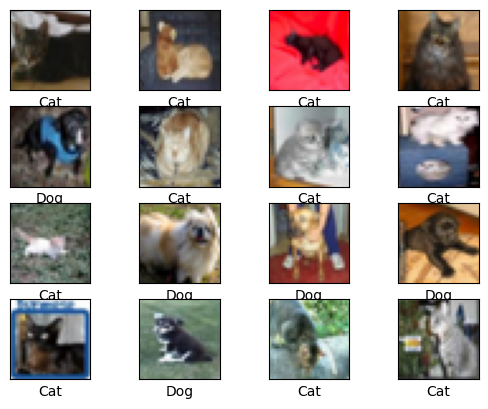

In [21]:
# Display the first 16 images of cats and dogs
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    inh = training_labels[i] % 2
    plt.xlabel(class_names[inh])

plt.show()

#Model Building
We build a simple CNN model for binary classification (Cat or Dog).

In [31]:
# Build the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer has 1 neuron for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Model Training
We train the model on the filtered training dataset.

In [32]:
# Train the model
model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

Epoch 1/10
313/313 [==============================] - 15s 45ms/step - loss: 0.6783 - accuracy: 0.5590 - val_loss: 0.6349 - val_accuracy: 0.6315
Epoch 2/10
313/313 [==============================] - 13s 43ms/step - loss: 0.6072 - accuracy: 0.6704 - val_loss: 0.5642 - val_accuracy: 0.7085
Epoch 3/10
313/313 [==============================] - 13s 42ms/step - loss: 0.5575 - accuracy: 0.7133 - val_loss: 0.5415 - val_accuracy: 0.7170
Epoch 4/10
313/313 [==============================] - 14s 45ms/step - loss: 0.5255 - accuracy: 0.7392 - val_loss: 0.5190 - val_accuracy: 0.7320
Epoch 5/10
313/313 [==============================] - 15s 47ms/step - loss: 0.4986 - accuracy: 0.7521 - val_loss: 0.5188 - val_accuracy: 0.7390
Epoch 6/10
313/313 [==============================] - 13s 43ms/step - loss: 0.4685 - accuracy: 0.7747 - val_loss: 0.4995 - val_accuracy: 0.7540
Epoch 7/10
313/313 [==============================] - 14s 44ms/step - loss: 0.4457 - accuracy: 0.7864 - val_loss: 0.5026 - val_accuracy:

#Model Evaluation
We evaluate the model on the testing dataset and print the loss and accuracy.

In [33]:
# Evaluate the model
loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

63/63 [==============================] - 1s 11ms/step - loss: 0.5044 - accuracy: 0.7645
Loss: 0.5044006109237671
Accuracy: 0.7645000219345093


#Prediction on a Sample Image
We load and predict on a sample image using the trained model.

1/1 [==============================] - 0s 91ms/step
Prediction is Dog


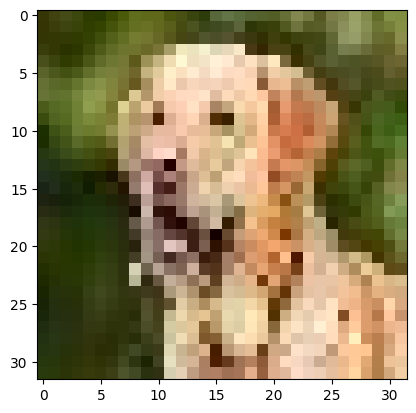

In [34]:
# Load and predict on a sample image (replace 'Dog5.jpg' with the path to your cat or dog image)
img = cv.imread('/Dog5.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, cmap=plt.cm.binary)

# Preprocess the image and make a prediction
img = cv.resize(img, (32, 32))
img = img / 255.0
prediction = model.predict(np.array([img]))
result = (prediction > 0.5).astype(int)
index = result[0, 0]
print(f'Prediction is {class_names[index]}')

plt.show()

1/1 [==============================] - 0s 41ms/step
Prediction is Cat


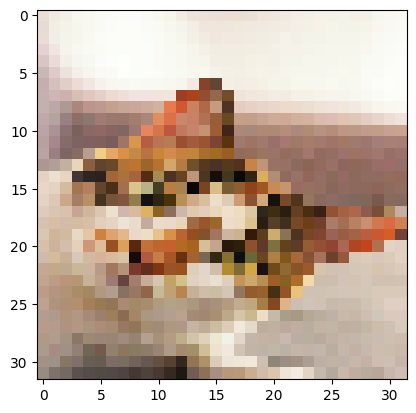

In [35]:
img = cv.imread('/cat_image1.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, cmap=plt.cm.binary)

# Preprocess the image and make a prediction
img = cv.resize(img, (32, 32))
img = img / 255.0
prediction = model.predict(np.array([img]))
result = (prediction > 0.5).astype(int)
index = result[0, 0]
print(f'Prediction is {class_names[index]}')

plt.show()

1/1 [==============================] - 0s 30ms/step
Prediction is Cat


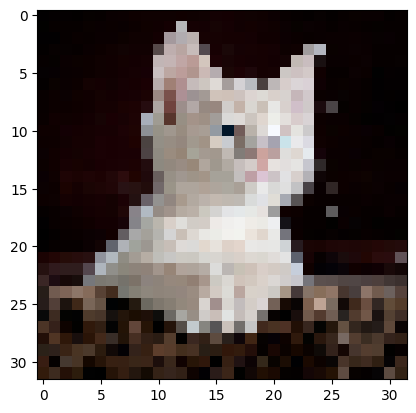

In [36]:
img = cv.imread('/cat_image2.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, cmap=plt.cm.binary)

# Preprocess the image and make a prediction
img = cv.resize(img, (32, 32))
img = img / 255.0
prediction = model.predict(np.array([img]))
result = (prediction > 0.5).astype(int)
index = result[0, 0]
print(f'Prediction is {class_names[index]}')

plt.show()

1/1 [==============================] - 0s 29ms/step
Prediction is Dog


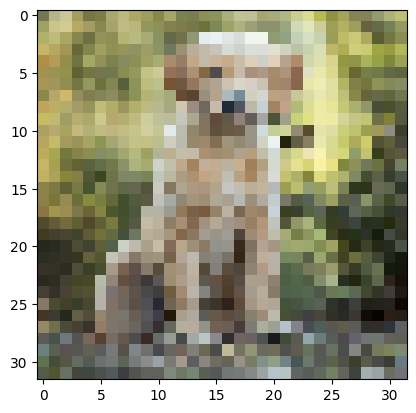

In [37]:
img = cv.imread('/dog6.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, cmap=plt.cm.binary)

# Preprocess the image and make a prediction
img = cv.resize(img, (32, 32))
img = img / 255.0
prediction = model.predict(np.array([img]))
result = (prediction > 0.5).astype(int)
index = result[0, 0]
print(f'Prediction is {class_names[index]}')

plt.show()